In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import Isomap
from sklearn.cluster import SpectralClustering
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [3]:
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import homogeneity_score
from scipy.stats import mode

In [4]:
mnist = pd.read_csv("resources/data.csv")


In [6]:
# Selecting a subset of mnist

data = mnist[:1000]

In [7]:
data.shape

(1000, 785)

In [8]:
# Preprocessing the data

X = data.drop(columns='label')
y = data['label']

In [9]:
#Normalazing the Data 

X = X / 255.0
y = y.astype("int64")

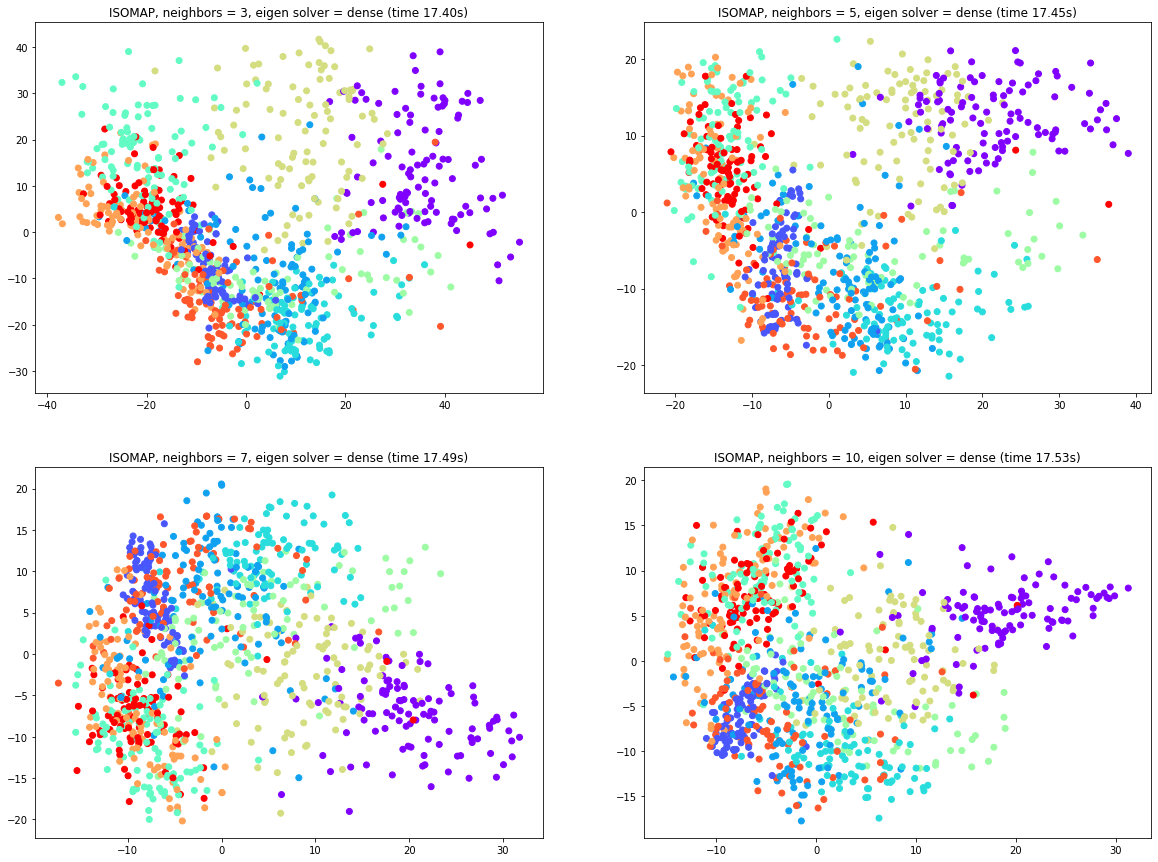

In [52]:
# Isomap Dimensional Reduction:

t0 = time()
iso1 = Isomap(n_neighbors=3,n_components=2,eigen_solver="dense") 
X_iso1 = iso1.fit_transform(X) 

iso2 = Isomap(n_neighbors=5,n_components=2,eigen_solver="dense") 
X_iso2 = iso2.fit_transform(X) 

iso3 = Isomap(n_neighbors=7,n_components=2,eigen_solver="dense")
X_iso3 = iso3.fit_transform(X) 

iso4 = Isomap(n_neighbors=10,n_components=2,eigen_solver="dense") 
X_iso4 = iso4.fit_transform(X) 

#Plots 
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.scatter(X_iso1[:,0],X_iso1[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 3, eigen solver = dense (time %.2fs)" %
               (time() - t0))
plt.subplot(2,2,2)
plt.scatter(X_iso2[:,0],X_iso2[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 5, eigen solver = dense (time %.2fs)" %
               (time() - t0))
plt.subplot(2,2,3)
plt.scatter(X_iso3[:,0],X_iso3[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 7, eigen solver = dense (time %.2fs)" %
               (time() - t0))
plt.subplot(2,2,4)
plt.scatter(X_iso4[:,0],X_iso4[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 10, eigen solver = dense (time %.2fs)" %
               (time() - t0))
plt.show()

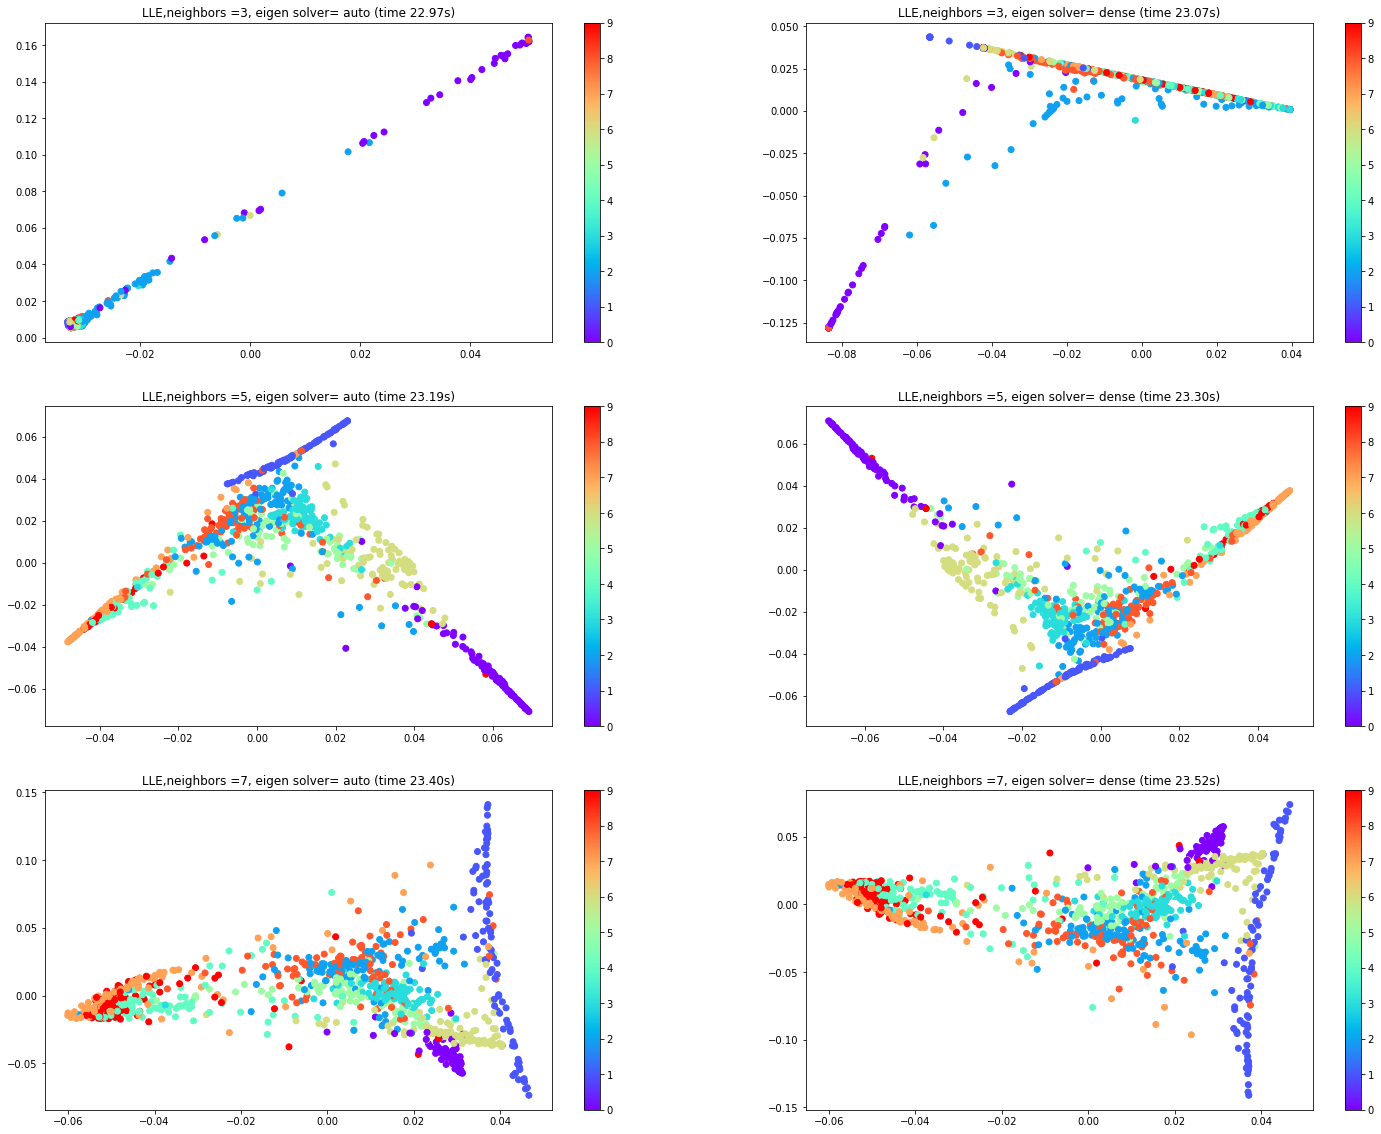

In [59]:
# LLE Reduction

t0 = time()
lle1 = LocallyLinearEmbedding(n_neighbors=3,n_components=2,eigen_solver="auto") 
X_lle1 = lle1.fit_transform(X) 

lle2 = LocallyLinearEmbedding(n_neighbors=3,n_components=2,eigen_solver="dense") 
X_lle2 = lle2.fit_transform(X) 

lle3 = LocallyLinearEmbedding(n_neighbors=5,n_components=2,eigen_solver="auto") 
X_lle3 = lle3.fit_transform(X) 

lle4 = LocallyLinearEmbedding(n_neighbors=5,n_components=2,eigen_solver="dense") 
X_lle4 = lle4.fit_transform(X) 

lle5 = LocallyLinearEmbedding(n_neighbors=7,n_components=2,eigen_solver="auto") 
X_lle5 = lle5.fit_transform(X) 

lle6 = LocallyLinearEmbedding(n_neighbors=7,n_components=2,eigen_solver="dense") 
X_lle6 = lle6.fit_transform(X) 

#LLe Plots

plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.scatter(X_lle1[:,0],X_lle1[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =3, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,2)
plt.scatter(X_lle2[:,0],X_lle2[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =3, eigen solver= dense (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,3)
plt.scatter(X_lle3[:,0],X_lle3[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =5, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,4)
plt.scatter(X_lle4[:,0],X_lle4[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =5, eigen solver= dense (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,5)
plt.scatter(X_lle5[:,0],X_lle5[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =7, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,6)
plt.scatter(X_lle6[:,0],X_lle6[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =7, eigen solver= dense (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.show()

In [48]:
# Clustering with Isomap

#Dimensonality Reduction with ISOMap first
t0=time()
iso = Isomap(n_neighbors=5,n_components=2)
X_iso = iso.fit_transform(X)

# Setting the clustering operation 

clust = SpectralClustering(n_clusters=4,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC = clust.fit(X_iso)

y_pred = clust.fit_predict(X_iso)

clust1 = SpectralClustering(n_clusters=6,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC1 = clust1.fit(X_iso)

y_pred1 = clust1.fit_predict(X_iso)

clust2 = SpectralClustering(n_clusters=8,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC2 = clust2.fit(X_iso)

y_pred2 = clust2.fit_predict(X_iso)

#Homogeneity score

print("Homogeneity Score for Clusters=4: ", (homogeneity_score(y_pred,y))*100)
print("Homogeneity Score for Clusters=6: ", (homogeneity_score(y_pred1,y))*100)
print("Homogeneity Score for Clusters=8: ", (homogeneity_score(y_pred2,y))*100)

print(confusion_matrix(y, y_pred))
print(confusion_matrix(y, y_pred1))
print(confusion_matrix(y, y_pred2))


Homogeneity Score:  60.27638795241462
Homogeneity Score:  48.45026384131227
Homogeneity Score:  46.779656705078324
[[  0   0 107   0   0   0   0   0   0   0]
 [ 95   0   0   1   0   0   0   0   0   0]
 [ 34   4   7  79   0   0   0   0   0   0]
 [  5   1   2  82   0   0   0   0   0   0]
 [  9  92   1   0   0   0   0   0   0   0]
 [ 34   2  18  35   0   0   0   0   0   0]
 [  3   5  83   6   0   0   0   0   0   0]
 [ 41  64   0   0   0   0   0   0   0   0]
 [ 59   2   2  30   0   0   0   0   0   0]
 [ 18  77   2   0   0   0   0   0   0   0]]
[[84 23  0  0  0  0  0  0  0  0]
 [ 0 46 48  1  0  1  0  0  0  0]
 [ 1 35  9  8  2 69  0  0  0  0]
 [ 2  0  4  2  0 82  0  0  0  0]
 [ 0  5  2 38 57  0  0  0  0  0]
 [16 35  3  5  1 29  0  0  0  0]
 [15 78  0  1  2  1  0  0  0  0]
 [ 0  2 13 48 42  0  0  0  0  0]
 [ 2 13 47  6  0 25  0  0  0  0]
 [ 2  4  3 63 25  0  0  0  0  0]]
[[45  0  0  0  0 61  0  1  0  0]
 [ 0  0  0 49  1  0 42  4  0  0]
 [ 7  1  3 19 33  0  9 52  0  0]
 [ 0  0  2  1 71  2  3 1

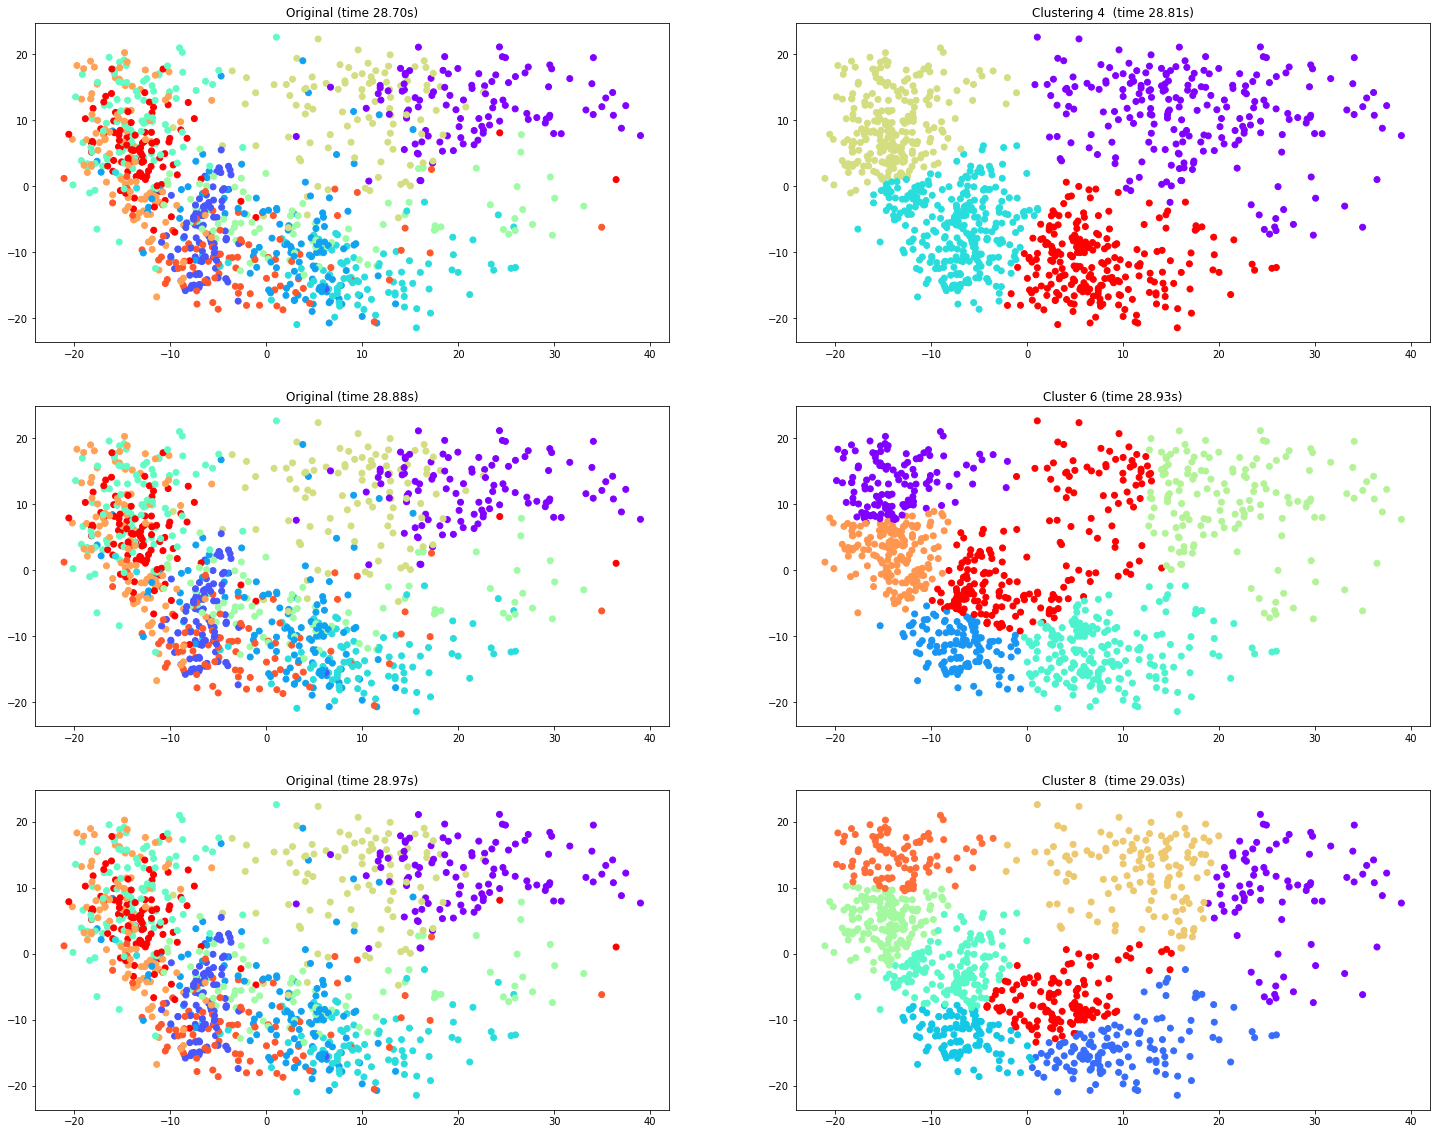

In [24]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.subplot(3,2,2)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred,cmap="rainbow")
plt.title( "Clustering 4  (time %.2fs)" %
               (time() - t0))
plt.subplot(3,2,3)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.subplot(3,2,4)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred1,cmap="rainbow")
plt.title( "Cluster 6 (time %.2fs)" %
               (time() - t0))
plt.subplot(3,2,5)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.subplot(3,2,6)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred2,cmap="rainbow")
plt.title( "Cluster 8  (time %.2fs)" %
               (time() - t0))
plt.show()

In [ ]:
#Calcuating purity 

purity = (107+95+79+82+92+35+83+64+59+77)/1000
purity1 = (98+48+69+81+57+34+62+47+47+63)/1000
purity2 = (61+49+52+71+46+32+78+41+44+65)/1000

print(purity*100)
print(purity1*100)
print(round(purity2,4)*100)

In [45]:
Pur=[77.33,60.6,53.9]
Clus=["3 Clusters","6 Clusters","8 Clusters"]
Ho=[60.28,48.62,46.78]

In [46]:
#Total Results

Result = pd.DataFrame({"Clusters":Clus,
                       "Homogeneity Score":Ho,
                       "Purity Score":Pur},
                      columns=["Clusters","Homogeneity Score","Purity Score"])
    

In [47]:
Result


,Clusters,Homogeneity Score,Purity Score
0,3 Clusters,60.28,77.33
1,6 Clusters,48.62,60.60
2,8 Clusters,46.78,53.90
